https://learn.microsoft.com/en-us/cpp/windows/latest-supported-vc-redist?view=msvc-170

In [1]:
import tensorflow as tf
from tensorflow.keras.datasetssets import mnist

In [2]:
(training_data, training_labels), (testing_data, testing_labels) = mnist.load_data()

In [4]:
training_data = training_data / 255.0
testing_data = testing_data / 255.0

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
model = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
training = model.fit(training_data, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2475 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1021 - accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0720 - accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0571 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0442 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0394 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0328 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0261 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.02

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
 dense_1 (Dense)             (32, 64)                  8256      
                                                                 
 dense_2 (Dense)             (32, 32)                  2080      
                                                                 
 dense_3 (Dense)             (32, 10)                  330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
accuracy = training.history['accuracy']
loss = training.history['loss']

In [11]:
epochs = range(len(accuracy))

In [12]:
!pip install matplotlib

In [13]:
import matplotlib.pyplot as plt

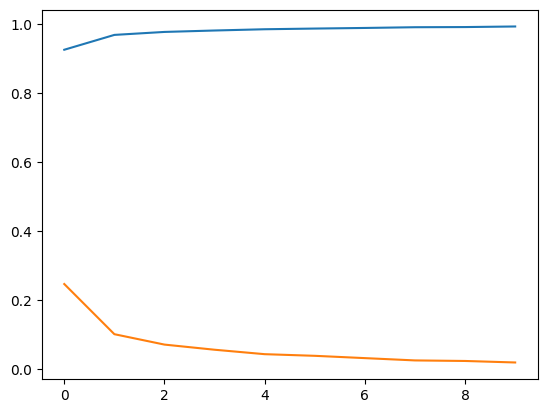

In [14]:
plt.plot(epochs, accuracy)
plt.plot(epochs, loss)
plt.show()

In [15]:
model.save('./../savedModels/model.h5')

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
path = './../testingImages/zero.webp'
input_image = image.load_img(path, color_mode='grayscale', target_size=(28, 28))
numerical_values = image.img_to_array(input_image)
expand_dimensions = np.expand_dims(numerical_values, axis=0)
predicted_value = model.predict(expand_dimensions)

1/1 [==============================] - 0s 25ms/step


In [27]:
predicted_value

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
argmax_predictions = np.argmax(predicted_value)

In [29]:
argmax_predictions

0